In [1]:
import numpy as np
import pandas as pd
from skimage import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

2024-05-22 22:09:51.498931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 22:09:52.324720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
img_width=128
img_height=128
img_size=(img_width,img_height)
img_channels=3

In [3]:
train_directory = "data/dogs-vs-cats/train"
image_files=os.listdir(train_directory)
# image_files

In [4]:
def display_images(image_files, num_images, directory):
    """
    Function to display a specified number of images from a list of filenames using scikit-image and matplotlib.

    Parameters:
    image_files (list): List of image file paths to display.
    num_images (int): Number of images to display.
    directory (str): Directory where the image files are located.
    """
    for image_file in image_files[:num_images]:
        img_path = os.path.join(directory, image_file)
        img = io.imread(img_path)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')
        plt.show()

In [5]:
# display_images(image_files, 10, directory)

In [6]:
# dog - 1, cat - 0
categories=[]
for img_name in image_files:
    category=img_name.split('.')[0]
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'image_name':image_files,
    'category':categories
})
df

image_name  category
0       dog.8659.jpg         1
1       cat.4935.jpg         0
2       cat.9291.jpg         0
3      cat.10060.jpg         0
4       dog.4013.jpg         1
...              ...       ...
24995   cat.8839.jpg         0
24996   dog.3416.jpg         1
24997  cat.12295.jpg         0
24998    dog.495.jpg         1
24999    dog.402.jpg         1

[25000 rows x 2 columns]

## Build a model ##

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Input

In [8]:
model = Sequential()
# Add the Input layer
model.add(Input(shape=(img_width, img_height, img_channels)))

# First Convolutional Block with 32 filters
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second Convolutional Block with 64 filters
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third Convolutional Block with 128 filters
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(2, activation='softmax'))

2024-05-22 22:10:03.484690: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 22:10:03.599534: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 22:10:03.599781: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [10]:
# Define callbacks and learning rate:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

## Managing the data

In [11]:
# Function to plot images
def plot_images(images_arr, titles=None):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax, title in zip(images_arr, axes, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [12]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
df

image_name category
0       dog.8659.jpg      dog
1       cat.4935.jpg      cat
2       cat.9291.jpg      cat
3      cat.10060.jpg      cat
4       dog.4013.jpg      dog
...              ...      ...
24995   cat.8839.jpg      cat
24996   dog.3416.jpg      dog
24997  cat.12295.jpg      cat
24998    dog.495.jpg      dog
24999    dog.402.jpg      dog

[25000 rows x 2 columns]

In [13]:
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
train_df, validate_df

(         image_name category
 0      cat.6814.jpg      cat
 1      dog.8540.jpg      dog
 2       dog.863.jpg      dog
 3      dog.7280.jpg      dog
 4      cat.2988.jpg      cat
 ...             ...      ...
 19995  dog.6995.jpg      dog
 19996  dog.8152.jpg      dog
 19997  dog.9058.jpg      dog
 19998  cat.2183.jpg      cat
 19999  cat.7635.jpg      cat
 
 [20000 rows x 2 columns],
          image_name category
 0      dog.4554.jpg      dog
 1      dog.2058.jpg      dog
 2     dog.12412.jpg      dog
 3      cat.7455.jpg      cat
 4      dog.9028.jpg      dog
 ...             ...      ...
 4995  dog.12365.jpg      dog
 4996   dog.6785.jpg      dog
 4997   dog.2101.jpg      dog
 4998   cat.2708.jpg      cat
 4999   cat.3801.jpg      cat
 
 [5000 rows x 2 columns])

In [14]:
train_df.shape, validate_df.shape

((20000, 2), (5000, 2))

In [15]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
print(total_validate)
batch_size = 15

5000


**Training and validation data generator**

In [16]:
# Create an instance of ImageDataGenerator with augmentation options
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [17]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, train_directory, 
    x_col='image_name', y_col='category', 
    target_size=img_size, 
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [18]:
images, labels = next(train_generator)
plot_images(images, titles=train_df['image_name'].values[:batch_size])

In [19]:
# display_images(train_df['image_name'].values, num_images=batch_size, directory=train_directory)

In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    train_directory, 
    x_col='image_name',
    y_col='category',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [22]:
# Calculate steps per epoch
steps_per_epoch = total_train // batch_size
validation_steps = total_validate // batch_size

# Train the model
epochs = 10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    steps_per_epoch=steps_per_epoch,
    callbacks=callbacks
)

Epoch 1/10


/home/kazi/Works/Projects/dogs-cats/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716408624.553869    7074 service.cc:145] XLA service 0x77b2d0010a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716408624.553911    7074 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-05-22 22:10:24.618585: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 22:10:24.796610: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDN

   5/1333 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.4471 - loss: 2.9865

I0000 00:00:1716408629.647935    7074 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 875/1333 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.5722 - loss: 1.0339

I0000 00:00:1716408666.211608    7074 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 60 bytes spill stores, 60 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 76 bytes spill stores, 76 bytes spill loads



1333/1333 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.5892 - loss: 0.9370 - val_accuracy: 0.6444 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 2/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 130us/step - accuracy: 0.6000 - loss: 0.6971 - val_accuracy: 0.6000 - val_loss: 0.8376 - learning_rate: 0.0010
Epoch 3/10


2024-05-22 22:11:27.206385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:11:27.206438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-22 22:11:27.371579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:11:27.371628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is abortin

1333/1333 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.7137 - loss: 0.5618 - val_accuracy: 0.6937 - val_loss: 0.6691 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.8000 - loss: 0.5417 - val_accuracy: 0.6000 - val_loss: 0.3779 - learning_rate: 0.0010
Epoch 5/10


2024-05-22 22:12:17.696281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:12:17.696343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-22 22:12:17.696374: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2115259547128331536
2024-05-22 22:12:17.696391: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5457335372513101686
2024-05-22 22:12:17.701628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:12:17.701664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OU

1333/1333 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.7636 - loss: 0.4951 - val_accuracy: 0.8066 - val_loss: 0.4256 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.8000 - loss: 0.3557 - val_accuracy: 0.6000 - val_loss: 0.5638 - learning_rate: 0.0010
Epoch 7/10


2024-05-22 22:13:07.896039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:13:07.896082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-22 22:13:07.902185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:13:07.902237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-22 22:13:07.902253: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2115259547128331536
2024-05-22 22:13:07.902269: I tensorflow/core/framework/local_ren

1329/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7845 - loss: 0.4580
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 51s 38ms/step - accuracy: 0.7845 - loss: 0.4579 - val_accuracy: 0.7862 - val_loss: 0.5399 - learning_rate: 0.0010
Epoch 8/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.8000 - loss: 0.4574 - val_accuracy: 0.8000 - val_loss: 0.6167 - learning_rate: 5.0000e-04
Epoch 9/10


2024-05-22 22:13:58.636777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:13:58.636804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-22 22:13:58.636814: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2115259547128331536
2024-05-22 22:13:58.636822: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5457335372513101686
2024-05-22 22:13:58.644035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:13:58.644071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OU

1333/1333 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.8249 - loss: 0.3950 - val_accuracy: 0.8472 - val_loss: 0.3437 - learning_rate: 5.0000e-04
Epoch 10/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 1.0000 - loss: 0.1488 - val_accuracy: 1.0000 - val_loss: 0.2567 - learning_rate: 5.0000e-04


2024-05-22 22:14:49.073786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:14:49.073833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-22 22:14:49.073851: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 2115259547128331536
2024-05-22 22:14:49.073868: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5457335372513101686
2024-05-22 22:14:49.078953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-22 22:14:49.078976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OU

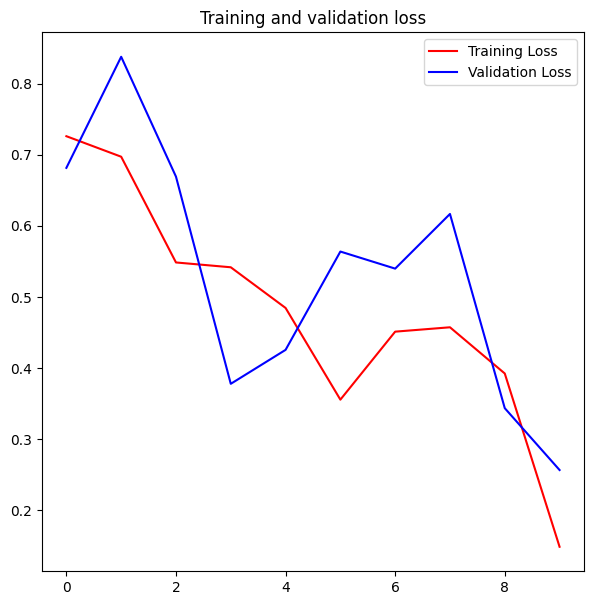

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
model.save("model1_cats-vs-dogs_10epoch.h5")

In [25]:
test_dirctory = "data/dogs-vs-cats/test1"
test_filenames = os.listdir(test_dirctory)
test_df = pd.DataFrame({
    'image_name': test_filenames
})
nb_samples = test_df.shape[0]
nb_samples

12500

In [26]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dirctory, 
    x_col = 'image_name',
    y_col = None,
    class_mode = None,
    target_size = img_size,
    batch_size = batch_size,
    shuffle = False
)

Found 12500 validated image filenames.


In [27]:
steps = int(np.ceil(nb_samples / batch_size))

predict = model.predict(test_generator, steps = steps)

834/834 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [28]:
predict

array([[2.9220814e-01, 7.0779192e-01],
       [9.5208891e-02, 9.0479112e-01],
       [7.6789802e-01, 2.3210198e-01],
       ...,
       [9.5536780e-01, 4.4632234e-02],
       [5.8859944e-01, 4.1140068e-01],
       [2.1080002e-04, 9.9978912e-01]], dtype=float32)

In [34]:
# Get the class with the highest probability
predicted_classes = np.argmax(predict, axis=1)

# Map numeric labels to class names
class_labels = {0: 'cat', 1: 'dog'}
test_df['category'] = predicted_classes
test_df['category'] = test_df['category'].map(class_labels)

print(test_df[['image_name', 'category']])

      image_name category
0      10395.jpg      dog
1       7766.jpg      dog
2       1798.jpg      cat
3       1679.jpg      cat
4      11670.jpg      dog
...          ...      ...
12495    501.jpg      dog
12496   3166.jpg      dog
12497   3873.jpg      cat
12498   3436.jpg      cat
12499   4302.jpg      dog

[12500 rows x 2 columns]


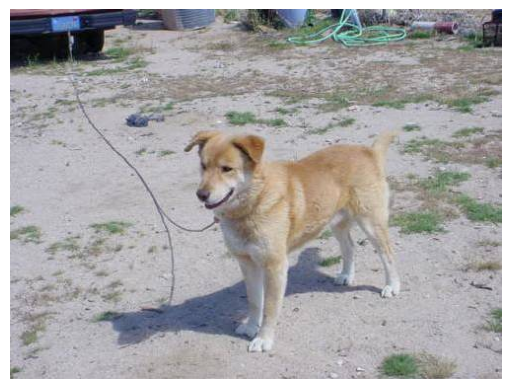

In [37]:
img_path = "data/dogs-vs-cats/test1/10395.jpg"
img = io.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

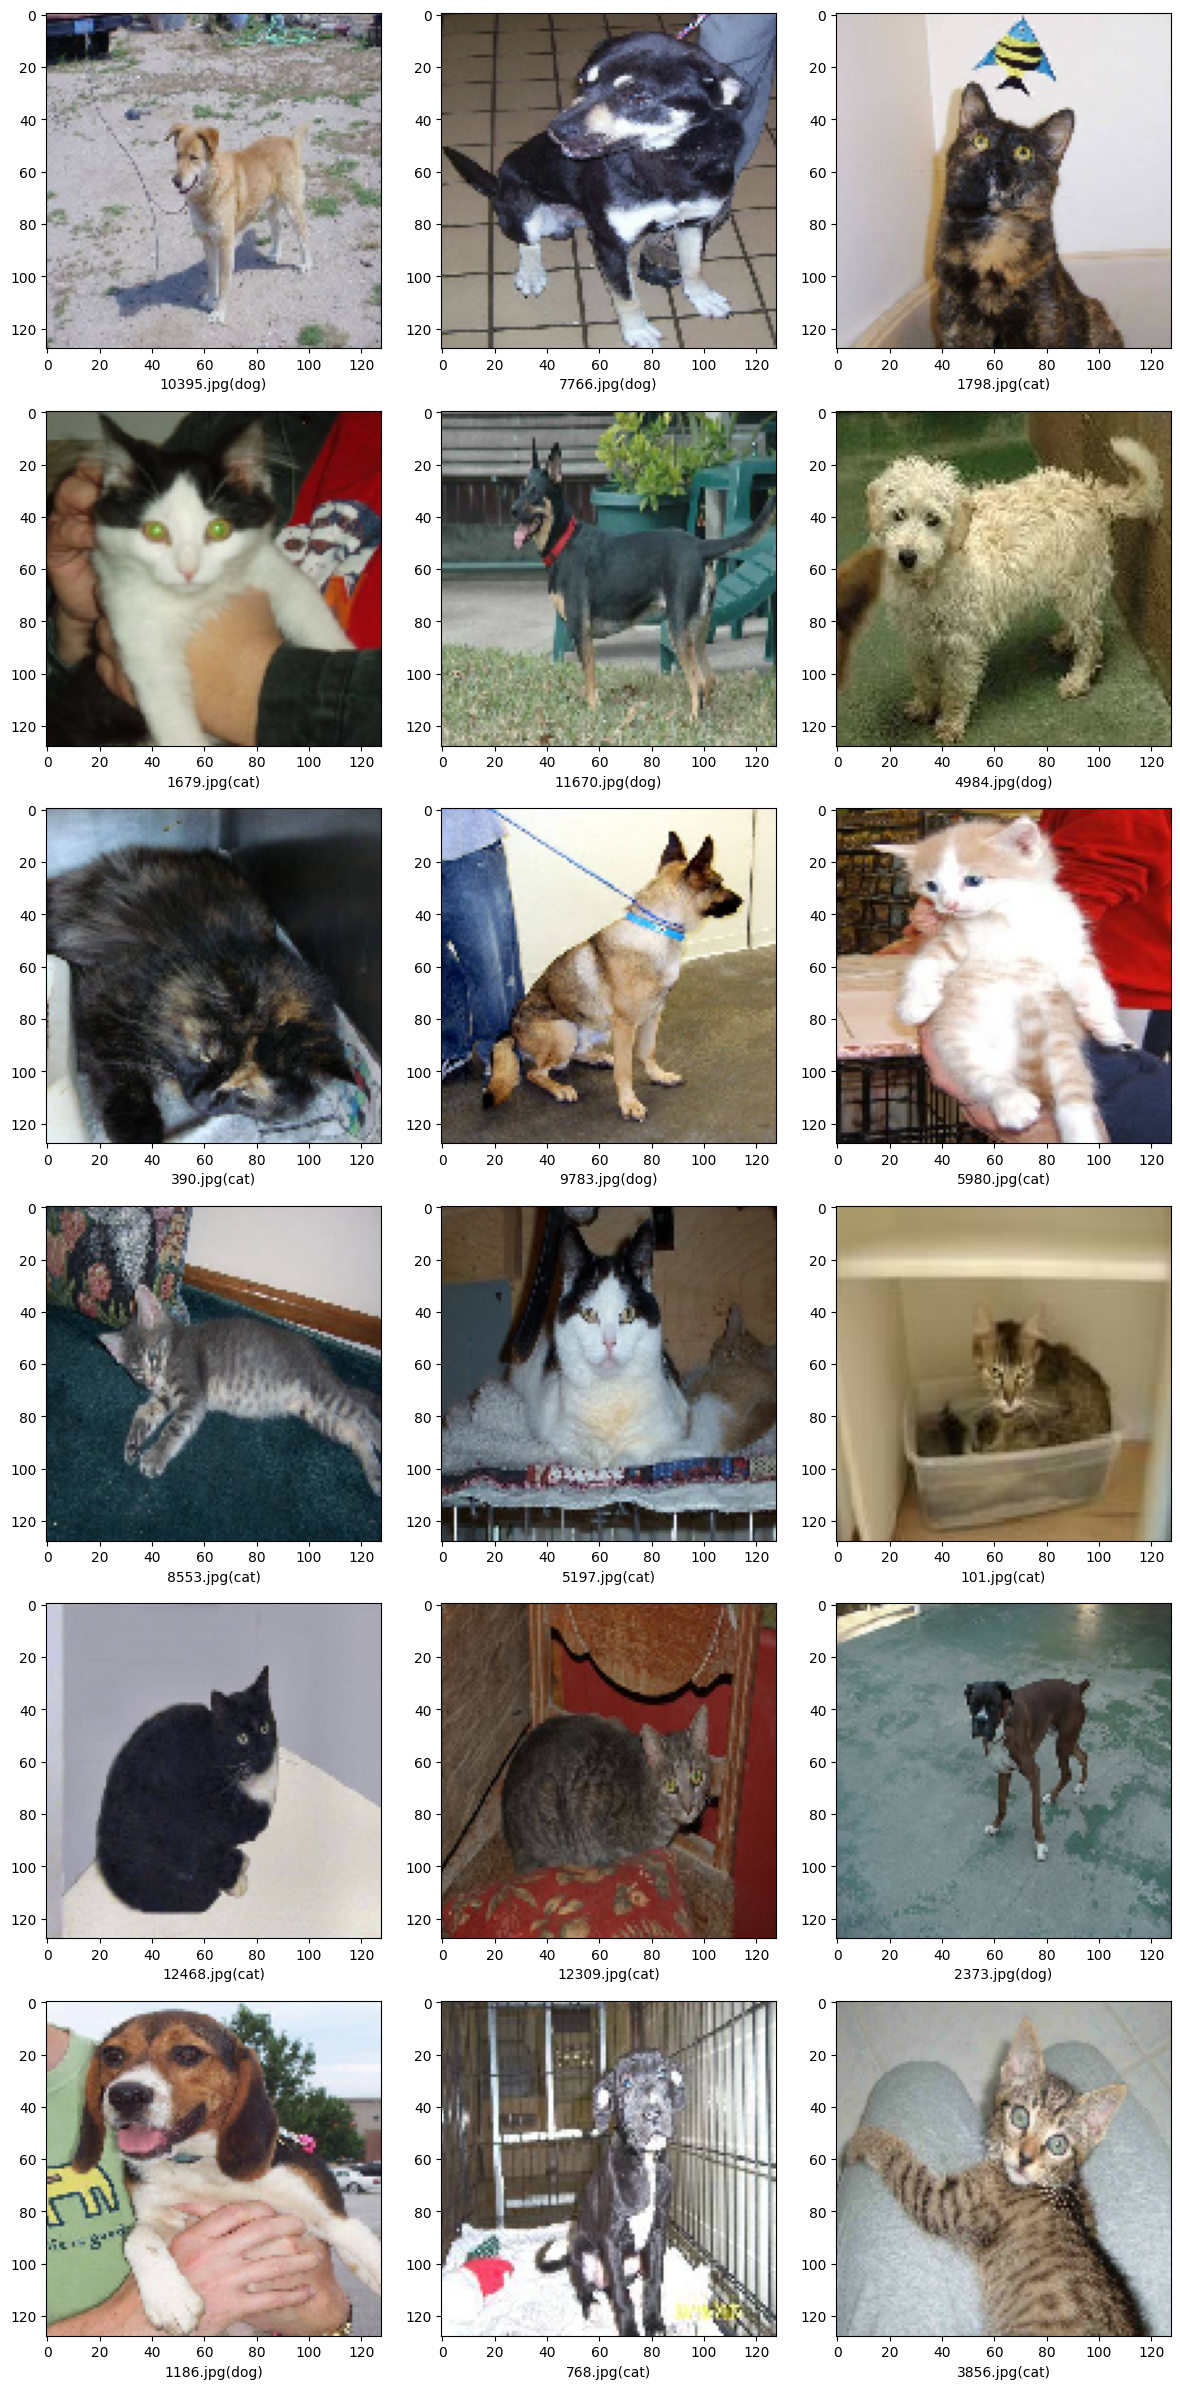

In [40]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['image_name']
    category = row['category']
    img = load_img("data/dogs-vs-cats/test1/"+filename, target_size=img_size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [43]:
# Test model performance on custom data
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
img = Image.open("data/NationalGeographic_2572187_square.jpg")
img = img.resize(img_size)
# Preprocess the Image
img = np.expand_dims(img, axis=0)
img = np.array(img)
img = img/255
# Predict the class of the image
pred = np.argmax(model.predict(img), axis=-1)[0]
print(pred, results[pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
0 cat
